# 4F13 - CW3 Code
Use a Jupyter Notebook as it takes so long

In [2]:
import scipy.io as sio
import numpy as np


data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']

## a - ML Multinomial

In [54]:
from tqdm import tqdm


W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(A[:, 0])  # number of documents in A

# Initialization: assign each document a mixture component at random
word_counts = np.zeros(W)  # counts of each word

# Populate the count matrices by looping over documents
for doc in tqdm(range(D)):
    doc_indices = np.where(A[:, 0] == doc+1)  # get all occurrences of document d in the training data
    word_ids = np.array(A[doc_indices, 1])  # unique word id's in document d
    counts = np.array(A[doc_indices, 2])  # counts of words in document d
    word_counts[word_ids-1] += counts  # number of times w is assigned to component k
print("complete")

num_words = np.sum(word_counts).astype(int)
word_frequencies = np.true_divide(word_counts, num_words)

print("W={} distinct words".format(W))
print("N={} total words".format(num_words))

100%|██████████| 2000/2000 [00:00<00:00, 4813.31it/s]complete
W=6906 distinct words
N=271898 total words



[0.0140972  0.00967642 0.00841124 0.00570067 0.00535863 0.00534392
 0.00498716 0.00497245 0.00468558 0.00450537 0.00432883 0.00401989
 0.00388749 0.00384335 0.00353441 0.00352706 0.00344615 0.00343143
 0.00342776 0.00340937]


Text(0, 0.5, 'Word')

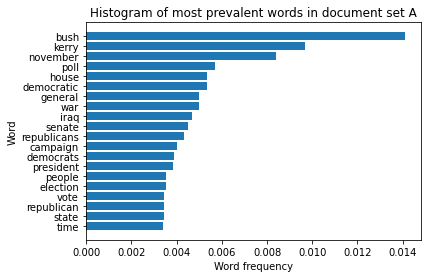

In [56]:
import matplotlib.pyplot as plt


cutoff = 20
top_word_indices = np.argsort(word_frequencies)[::-1][:cutoff]
top_frequencies = word_frequencies[top_word_indices]
top_words = [word[0] for word in V[top_word_indices, 0]]

print(top_frequencies)

plt.barh(top_words[::-1], top_frequencies[::-1])
plt.title("Histogram of most prevalent words in document set A")
plt.xlabel("Word frequency")
plt.ylabel("Word")

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.67784978e-06 3.67784978e-06
 3.67784978e-06 3.67784978e-06 3.67784978e-06 3.67784978e-06]


Text(0, 0.5, 'Word')

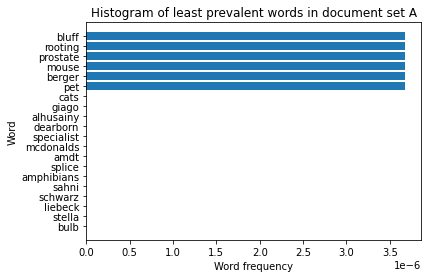

In [58]:
cutoff = 20
bottom_word_indices = np.argsort(word_frequencies)[:cutoff]
bottom_frequencies = word_frequencies[bottom_word_indices]
bottom_words = [word[0] for word in V[bottom_word_indices, 0]]

print(bottom_frequencies)

plt.barh(bottom_words, bottom_frequencies)
plt.title("Histogram of least prevalent words in document set A")
plt.xlabel("Word frequency")
plt.ylabel("Word")

## b - Bayesian Inference (Dirichlet)